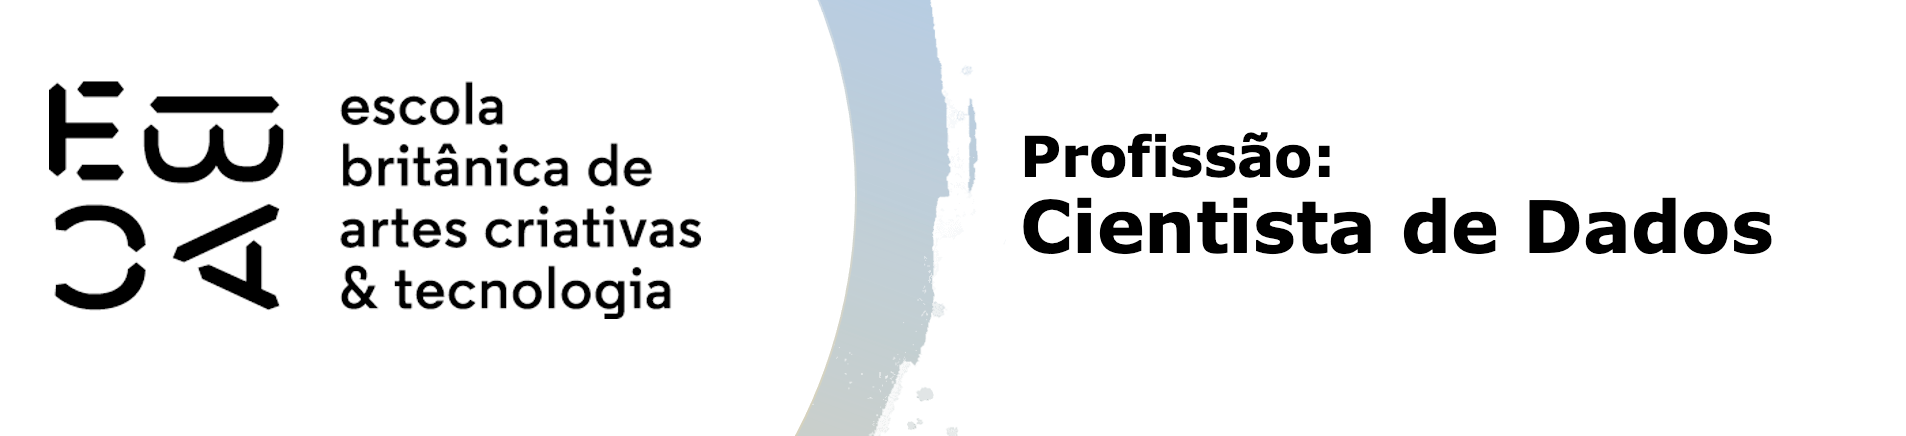

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

df_raw = pd.read_pickle('base_nfp.pkl')
df_raw.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [2]:
df_raw['resposta'] = np.where(df_raw['Retorno'] > 0, 1, 0) #criando a variável dependente booleana

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [3]:
#Filtrando os dados pela data (a partir de 2020)
data_inicial = '2020-01-01'
df = df_raw[df_raw['Data Emissão'] >= data_inicial]

In [4]:
df.loc[:, 'data'] = df['Data Emissão']
df.loc[:, 'dia_da_semana'] = df['data'].dt.dayofweek  # Dia da semana (0=segunda-feira, 6=domingo)
df.loc[:, 'fim_de_semana'] = df['dia_da_semana'].isin([5, 6]).astype(int)  # Dummy para fim de semana (1=fim de semana)
df.loc[:, 'dia_do_mes'] = df['data'].dt.day  # Dia do mês
df.loc[:, 'trimestre'] = df['data'].dt.quarter  # Trimestre
df.loc[:, 'mes'] = df['data'].dt.month # Mês
df.loc[:, 'ano'] = df['data'].dt.year # Ano

In [5]:
# Categorizando a variável Valor NF por quantis e adicionando ao dataframe

quantis_5 = pd.qcut(df['Valor NF'], 5, labels=False)
quantis_10 = pd.qcut(df['Valor NF'], 10, labels=False)
quantis_20 = pd.qcut(df['Valor NF'], 20, labels=False)
quantis_50 = pd.qcut(df['Valor NF'], 50, labels=False)

df.loc[:, 'valor_nf_quantis_5'] = quantis_5
df.loc[:, 'valor_nf_quantis_10'] = quantis_10
df.loc[:, 'valor_nf_quantis_20'] = quantis_20
df.loc[:, 'valor_nf_quantis_50'] = quantis_50

df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,dia_da_semana,fim_de_semana,dia_do_mes,trimestre,mes,ano,valor_nf_quantis_5,valor_nf_quantis_10,valor_nf_quantis_20,valor_nf_quantis_50
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,...,2,0,1,1,1,2020,2,5,11,27
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,...,2,0,1,1,1,2020,0,1,3,9
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,...,2,0,1,1,1,2020,1,3,6,15
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,...,2,0,1,1,1,2020,0,1,3,8
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,...,2,0,1,1,1,2020,2,5,11,28


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [6]:
variaveis_criadas = [
    'dia_da_semana', 'fim_de_semana', 'dia_do_mes', 'trimestre', 'mes', 'ano', 
    'valor_nf_quantis_5', 'valor_nf_quantis_10', 'valor_nf_quantis_20', 'valor_nf_quantis_50'
]

In [7]:
# Construindo o df de metadados

metadados = pd.DataFrame({
    'variavel': variaveis_criadas,
    'tipo': [df[var].dtype for var in variaveis_criadas]
})

metadados['papel'] = 'covariavel'

# Número de categorias únicas para cada variável
metadados['nunique'] = [df[var].nunique() for var in variaveis_criadas]

In [8]:
# Função para calcular o IV

def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rotulo_evento = tab.columns[0]
    rotulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rotulo_evento] / tab.loc['total', rotulo_evento]
    tab['pct_nao_evento'] = tab[rotulo_nao_evento] / tab.loc['total', rotulo_nao_evento]
    tab['woe'] = np.log(tab['pct_evento'] / tab['pct_nao_evento'])
    tab['iv_parcial'] = (tab['pct_evento'] - tab['pct_nao_evento']) * tab['woe']
    return tab['iv_parcial'].sum()

In [10]:
# Calculando o IV para cada covariável

metadados['IV'] = 0.0
resposta = df['resposta']

for var in metadados['variavel']:
    try:
        if metadados.loc[metadados['variavel'] == var, 'nunique'].values[0] > 5:
            metadados.loc[metadados['variavel'] == var, 'IV'] = IV(pd.qcut(df[var], 5, duplicates='drop'), resposta)
        else:
            metadados.loc[metadados['variavel'] == var, 'IV'] = IV(df[var], resposta)
    except Exception as e:
        print(f"Erro ao calcular IV para a variável {var}: {e}")
metadados

,variavel,tipo,papel,nunique,IV
0,dia_da_semana,int32,covariavel,7,0.005635
1,fim_de_semana,int32,covariavel,2,0.004599
2,dia_do_mes,int32,covariavel,31,0.003614
3,trimestre,int32,covariavel,4,0.003554
4,mes,int32,covariavel,12,0.003639
5,ano,int32,covariavel,2,0.003195
6,valor_nf_quantis_5,int64,covariavel,5,0.038990
7,valor_nf_quantis_10,int64,covariavel,10,0.038990
8,valor_nf_quantis_20,int64,covariavel,20,0.038990
9,valor_nf_quantis_50,int64,covariavel,50,0.038990


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

<p style="color: darkgreen;">O Valor NF apresenta maior poder de discriminação do que a data. Entre as variáveis de tempo, o ano apresenta maior poder de discriminação, seguido pelo trimestre. O número de categorias não afeta o valor de IV, pelo menos nesse caso, resultando no mesmo valor para 5, 10, 20 e 50 quantis.</p>

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [12]:
# Agrupando por trimestre
quantidade_notas_por_periodo = df.groupby('trimestre').size().reset_index(name='quantidade')
quantidade_notas_por_categoria_periodo = df.groupby(['trimestre', 'categoria']).size().reset_index(name='quantidade')
proporcao_notas_com_credito_por_categoria_periodo = df.groupby(['trimestre', 'categoria'])['resposta'].mean().reset_index(name='proporcao')

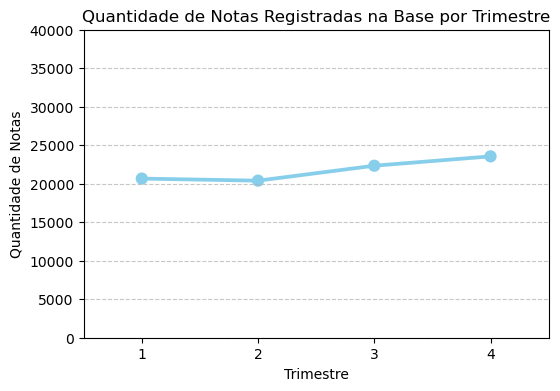

In [13]:
# Plot: quantidade de notas registradas na base por período
plt.figure(figsize=(6, 4))
sns.pointplot(data=quantidade_notas_por_periodo, x='trimestre', y='quantidade', color='skyblue', markers='o')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas Registradas na Base por Trimestre')
plt.ylim(0, 40000) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

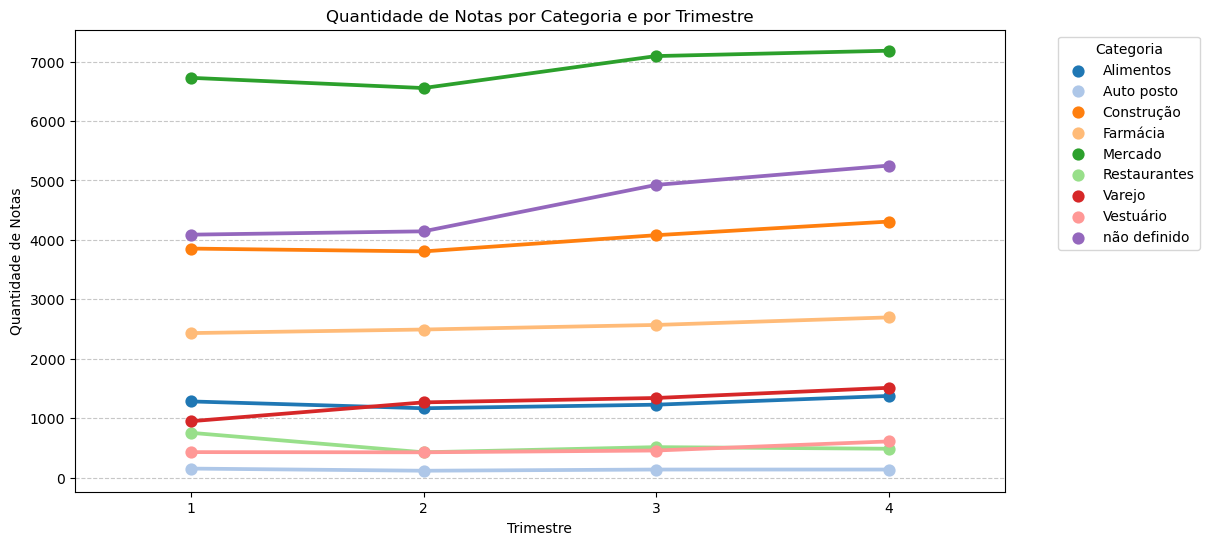

In [14]:
# Plot: quantidade de notas por categoria e por período
plt.figure(figsize=(12, 6))
sns.pointplot(data=quantidade_notas_por_categoria_periodo, x='trimestre', y='quantidade', hue='categoria', palette='tab20', markers='o')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas por Categoria e por Trimestre')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

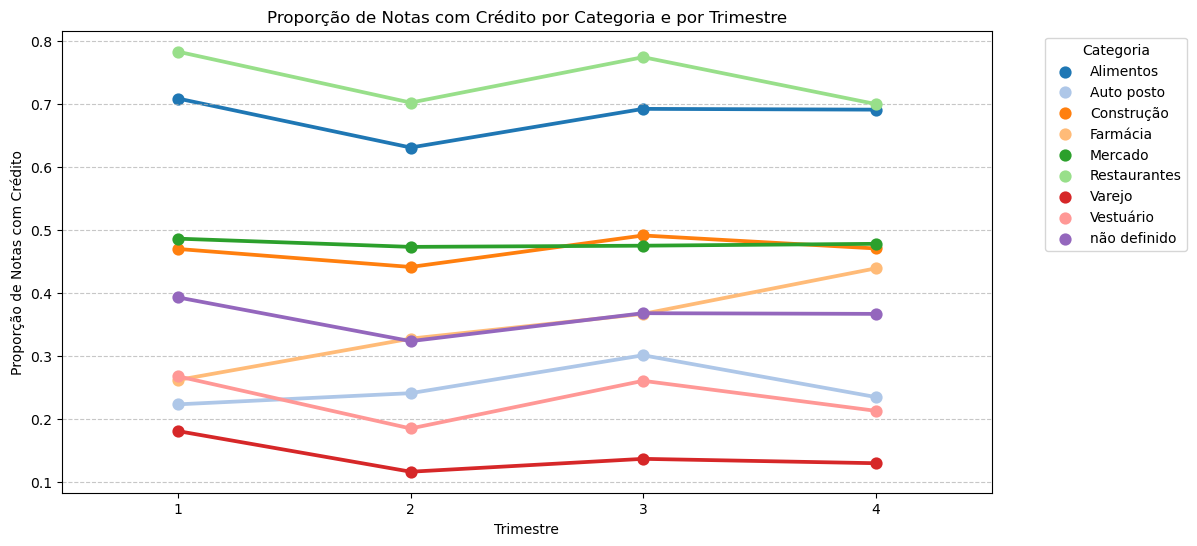

In [15]:
# Plot: proporção de notas com crédito por categoria e por período
plt.figure(figsize=(12, 6))
sns.pointplot(data=proporcao_notas_com_credito_por_categoria_periodo, x='trimestre', y='proporcao', hue='categoria', palette='tab20', markers='o')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.title('Proporção de Notas com Crédito por Categoria e por Trimestre')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [16]:
def calc_woe_iv(df, var, target):
   
    total_eventos = df[target].sum()
    total_nao_eventos = df[target].count() - total_eventos    
    grupo = df.groupby(var)[target].agg(['sum', 'count']).reset_index()
    grupo.columns = [var, 'eventos', 'total']
    grupo['nao_eventos'] = grupo['total'] - grupo['eventos']
    grupo['perc_eventos'] = grupo['eventos'] / total_eventos
    grupo['perc_nao_eventos'] = grupo['nao_eventos'] / total_nao_eventos
    
    # WOE
    grupo['woe'] = np.log(grupo['perc_eventos'] / grupo['perc_nao_eventos'])    
    # IV parcial
    grupo['iv_parcial'] = (grupo['perc_eventos'] - grupo['perc_nao_eventos']) * grupo['woe']    
    # IV total
    iv = grupo['iv_parcial'].sum()
    
    return grupo[[var, 'woe', 'iv_parcial']], iv

In [17]:
woe_iv_tempo = []

for trimestre in df['trimestre'].unique():
    df_trim = df[df['trimestre'] == trimestre]
    woe_iv, iv = calc_woe_iv(df_trim, 'categoria', 'resposta')
    for _, row in woe_iv.iterrows():
        woe_iv_tempo.append({'trimestre': trimestre, 'categoria': row['categoria'], 'woe': row['woe'], 'iv': iv})

woe_iv_df = pd.DataFrame(woe_iv_tempo)

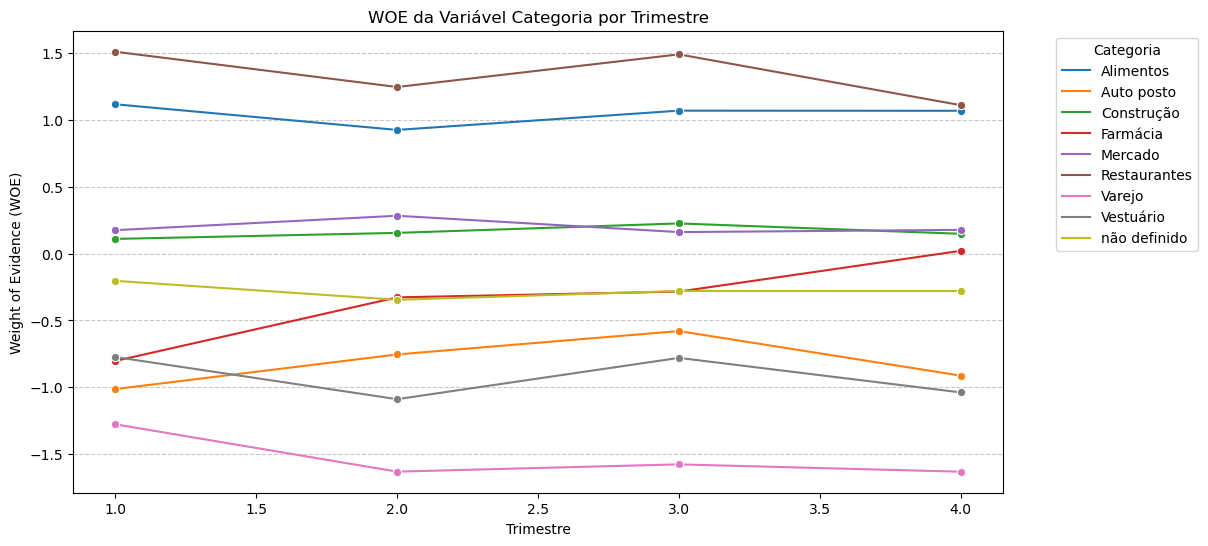

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=woe_iv_df, x='trimestre', y='woe', hue='categoria', marker='o')
plt.xlabel('Trimestre')
plt.ylabel('Weight of Evidence (WOE)')
plt.title('WOE da Variável Categoria por Trimestre')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

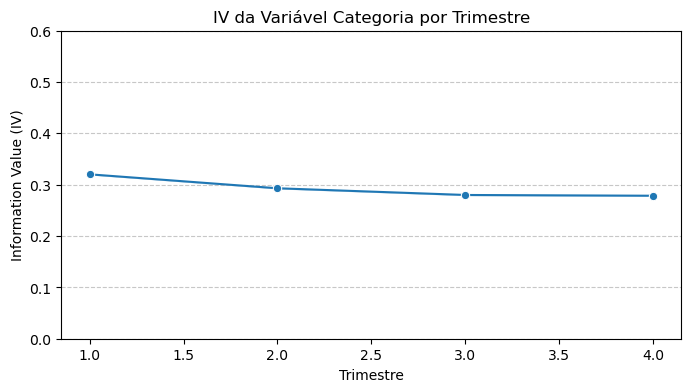

In [19]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=woe_iv_df, x='trimestre', y='iv', marker='o')
plt.xlabel('Trimestre')
plt.ylabel('Information Value (IV)')
plt.title('IV da Variável Categoria por Trimestre')
plt.ylim(0,0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Abaixo vamos fazer mais uma etapa para visualizar a distribuição de eventos e não eventos para cada categoria:

In [20]:
eventos_df = df.groupby('categoria').agg(
    eventos=('resposta', 'sum'),
    total=('resposta', 'count')
).reset_index()
eventos_df['nao_eventos'] = eventos_df['total'] - eventos_df['eventos']

eventos_df = eventos_df[['categoria', 'eventos', 'nao_eventos']]
eventos_df['nao_eventos'] = -eventos_df['nao_eventos']  # Valores negativos para não-eventos

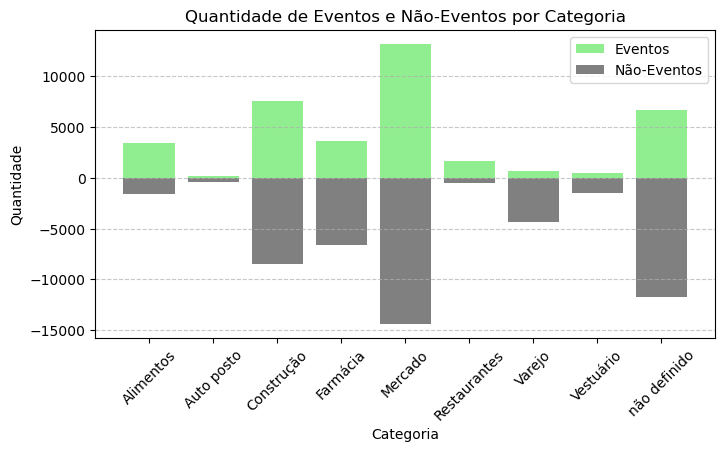

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(eventos_df['categoria'], eventos_df['eventos'], color='lightgreen', label='Eventos')
ax.bar(eventos_df['categoria'], eventos_df['nao_eventos'], color='grey', label='Não-Eventos')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Eventos e Não-Eventos por Categoria')
ax.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Apesar das categorias Alimentos e Restaurantes possuírem a maior proporção de retorno, em quantidade elas não são muito representativas.

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

<p style = "color:darkgreen">Pelo gráfico da proporção, e pelo gráfico do WOE, as categoria Alimentos e Restaurantes são as que tÊm mais retorno de crédito, sendo muito superiores às outras categorias, com respectivamente mais de 70% e 60% de retorno. De forma geral as variações entre os trimestres são muito leves, não havendo cruzamento entre essas variáveis e as demais.</p>

<p style = "color:darkgreen">
A variável categoria apresenta um valor de IV estável com o trimestre, no período observado (a partir de 2020).</p>